In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from matplotlib.pyplot import figure

In [2]:
path = r'C:\Users\kuohe\ClimateWins\02 Data'

In [3]:
col_names = ['DATE',
             'BASEL_pleasant_weather',
             'BELGRADE_pleasant_weather',
             'BUDAPEST_pleasant_weather',
             'DEBILT_pleasant_weather',
             'DUSSELDORF_pleasant_weather',
             'HEATHROW_pleasant_weather',
             'KASSEL_pleasant_weather',
             'LJUBLJANA_pleasant_weather',
             'MAASTRICHT_pleasant_weather',
             'MADRID_pleasant_weather',
             'MUNCHENB_pleasant_weather',
             'OSLO_pleasant_weather',
             'SONNBLICK_pleasant_weather',
             'STOCKHOLM_pleasant_weather',
             'VALENTIA_pleasant_weather']

df_labels = pd.read_csv(os.path.join(path, 'pleasant weather.csv'), index_col=False)

In [4]:
scaled = pd.read_csv(os.path.join(path, 'Dataset_scaled_correct.csv'))

In [5]:
df_labels

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
scaled['DATE'] = df_labels['DATE']

In [7]:
scaled = scaled.drop(columns=["id", "MONTH"])

In [8]:
scaled["DATE"] = scaled["DATE"].apply(pd.to_datetime)

In [9]:
scaled.dtypes

BASEL_cloud_cover                float64
BASEL_wind_speed                 float64
BASEL_humidity                   float64
BASEL_pressure                   float64
BASEL_global_radiation           float64
                               ...      
VALENTIA_sunshine                float64
VALENTIA_temp_mean               float64
VALENTIA_temp_min                float64
VALENTIA_temp_max                float64
DATE                      datetime64[ns]
Length: 169, dtype: object

In [10]:
scaled

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,...,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237,1970-01-01 00:00:00.019600101
1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,-0.462450,...,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141,1970-01-01 00:00:00.019600102
2,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,-0.186545,...,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078,1970-01-01 00:00:00.019600103
3,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,-0.385810,...,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511,1970-01-01 00:00:00.019600104
4,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,-1.075573,...,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186,1970-01-01 00:00:00.019600105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,0.720943,0.747959,0.779123,...,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530,1970-01-01 00:00:00.020221027
22946,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,0.187388,0.856604,1.223637,...,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530,1970-01-01 00:00:00.020221028
22947,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,0.349774,0.856604,1.039701,...,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530,1970-01-01 00:00:00.020221029
22948,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,0.280180,0.680055,0.809780,...,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530,1970-01-01 00:00:00.020221030


In [11]:
label_cols = list(df_labels.columns)
label_cols = [x.split("_")[0] for x in label_cols]
label_cols.remove('DATE')

In [12]:
label_cols

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [13]:
len(scaled.columns)

169

In [14]:
cols_to_keep = []
for col in label_cols:
    for scaled_col in scaled.columns:
        if col in scaled_col:
            cols_to_keep.append(scaled_col)

In [15]:
for col in cols_to_keep:
    print(col)

BASEL_cloud_cover
BASEL_wind_speed
BASEL_humidity
BASEL_pressure
BASEL_global_radiation
BASEL_precipitation
BASEL_snow_depth
BASEL_sunshine
BASEL_temp_mean
BASEL_temp_min
BASEL_temp_max
BELGRADE_cloud_cover
BELGRADE_humidity
BELGRADE_pressure
BELGRADE_global_radiation
BELGRADE_precipitation
BELGRADE_sunshine
BELGRADE_temp_mean
BELGRADE_temp_min
BELGRADE_temp_max
BUDAPEST_cloud_cover
BUDAPEST_humidity
BUDAPEST_pressure
BUDAPEST_global_radiation
BUDAPEST_precipitation
BUDAPEST_sunshine
BUDAPEST_temp_mean
BUDAPEST_temp_min
BUDAPEST_temp_max
DEBILT_cloud_cover
DEBILT_wind_speed
DEBILT_humidity
DEBILT_pressure
DEBILT_global_radiation
DEBILT_precipitation
DEBILT_sunshine
DEBILT_temp_mean
DEBILT_temp_min
DEBILT_temp_max
DUSSELDORF_cloud_cover
DUSSELDORF_wind_speed
DUSSELDORF_humidity
DUSSELDORF_pressure
DUSSELDORF_global_radiation
DUSSELDORF_precipitation
DUSSELDORF_snow_depth
DUSSELDORF_sunshine
DUSSELDORF_temp_mean
DUSSELDORF_temp_min
DUSSELDORF_temp_max
HEATHROW_cloud_cover
HEATHROW_humidi

In [16]:
len(cols_to_keep)

147

In [17]:
y = df_labels.iloc[:, 1:]
X = scaled[cols_to_keep]

In [18]:
# Assuming X is already defined and structured correctly
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Verify the structure of y_test
print(type(y_test))
print(y_test.shape)


<class 'pandas.core.frame.DataFrame'>
(5738, 15)


Model Accuracy: 0.38672011153712094


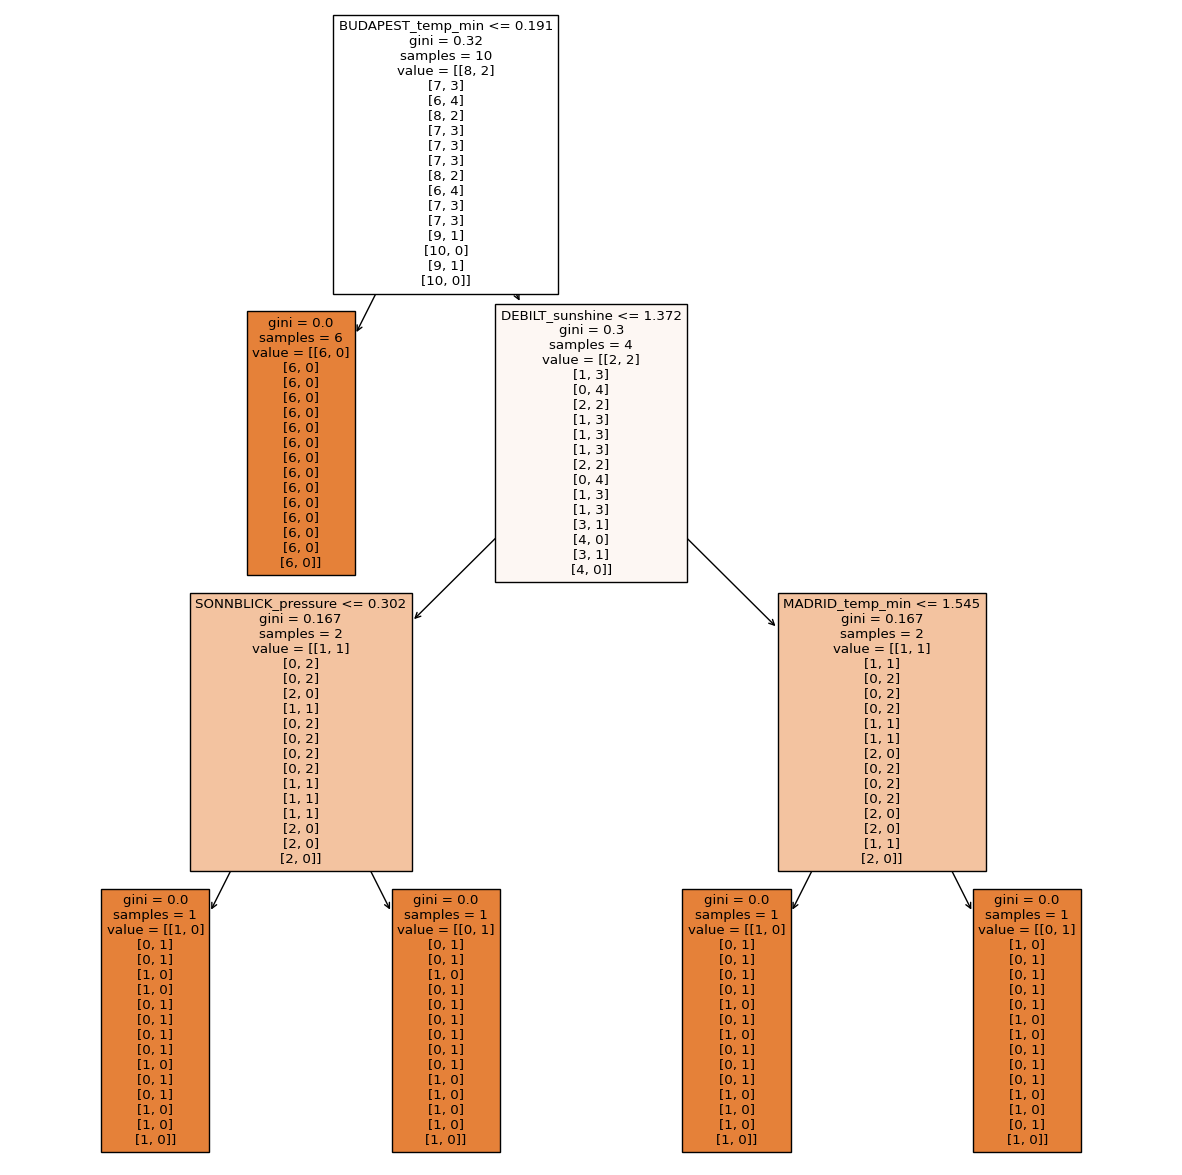

In [19]:
multi_target_dtree = DecisionTreeClassifier(criterion='gini', min_samples_split=2)

multi_target_dtree.fit(X_train.iloc[:10, :], y_train.iloc[:10, :])


y_pred = multi_target_dtree.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")


fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(multi_target_dtree,
                   feature_names=X.columns,
                   filled=True)


In [20]:
multi_target_dtree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.625     , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.16666667, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

              precision    recall  f1-score   support

           0       0.91      0.69      0.79      4338
           1       0.45      0.78      0.57      1400

    accuracy                           0.71      5738
   macro avg       0.68      0.74      0.68      5738
weighted avg       0.80      0.71      0.73      5738


              precision    recall  f1-score   support

           0       0.88      0.75      0.81      3776
           1       0.62      0.80      0.70      1962

    accuracy                           0.76      5738
   macro avg       0.75      0.77      0.75      5738
weighted avg       0.79      0.76      0.77      5738


              precision    recall  f1-score   support

           0       0.72      0.96      0.82      3900
           1       0.71      0.19      0.30      1838

    accuracy                           0.72      5738
   macro avg       0.71      0.58      0.56      5738
weighted avg       0.71      0.72      0.65      5738


              pr

C:\Users\kuohe\anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kuohe\anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kuohe\anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      4879
           1       0.00      0.00      0.00       859

    accuracy                           0.85      5738
   macro avg       0.43      0.50      0.46      5738
weighted avg       0.72      0.85      0.78      5738




C:\Users\kuohe\anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kuohe\anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kuohe\anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kuohe\anaconda2\Lib\site-packages\sklearn\metrics\_classification.py:1

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5738
           1       0.00      0.00      0.00         0

    accuracy                           0.98      5738
   macro avg       0.50      0.49      0.50      5738
weighted avg       1.00      0.98      0.99      5738


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      4766
           1       0.00      0.00      0.00       972

    accuracy                           0.83      5738
   macro avg       0.42      0.50      0.45      5738
weighted avg       0.69      0.83      0.75      5738




IndexError: index 15 is out of bounds for axis 1 with size 15

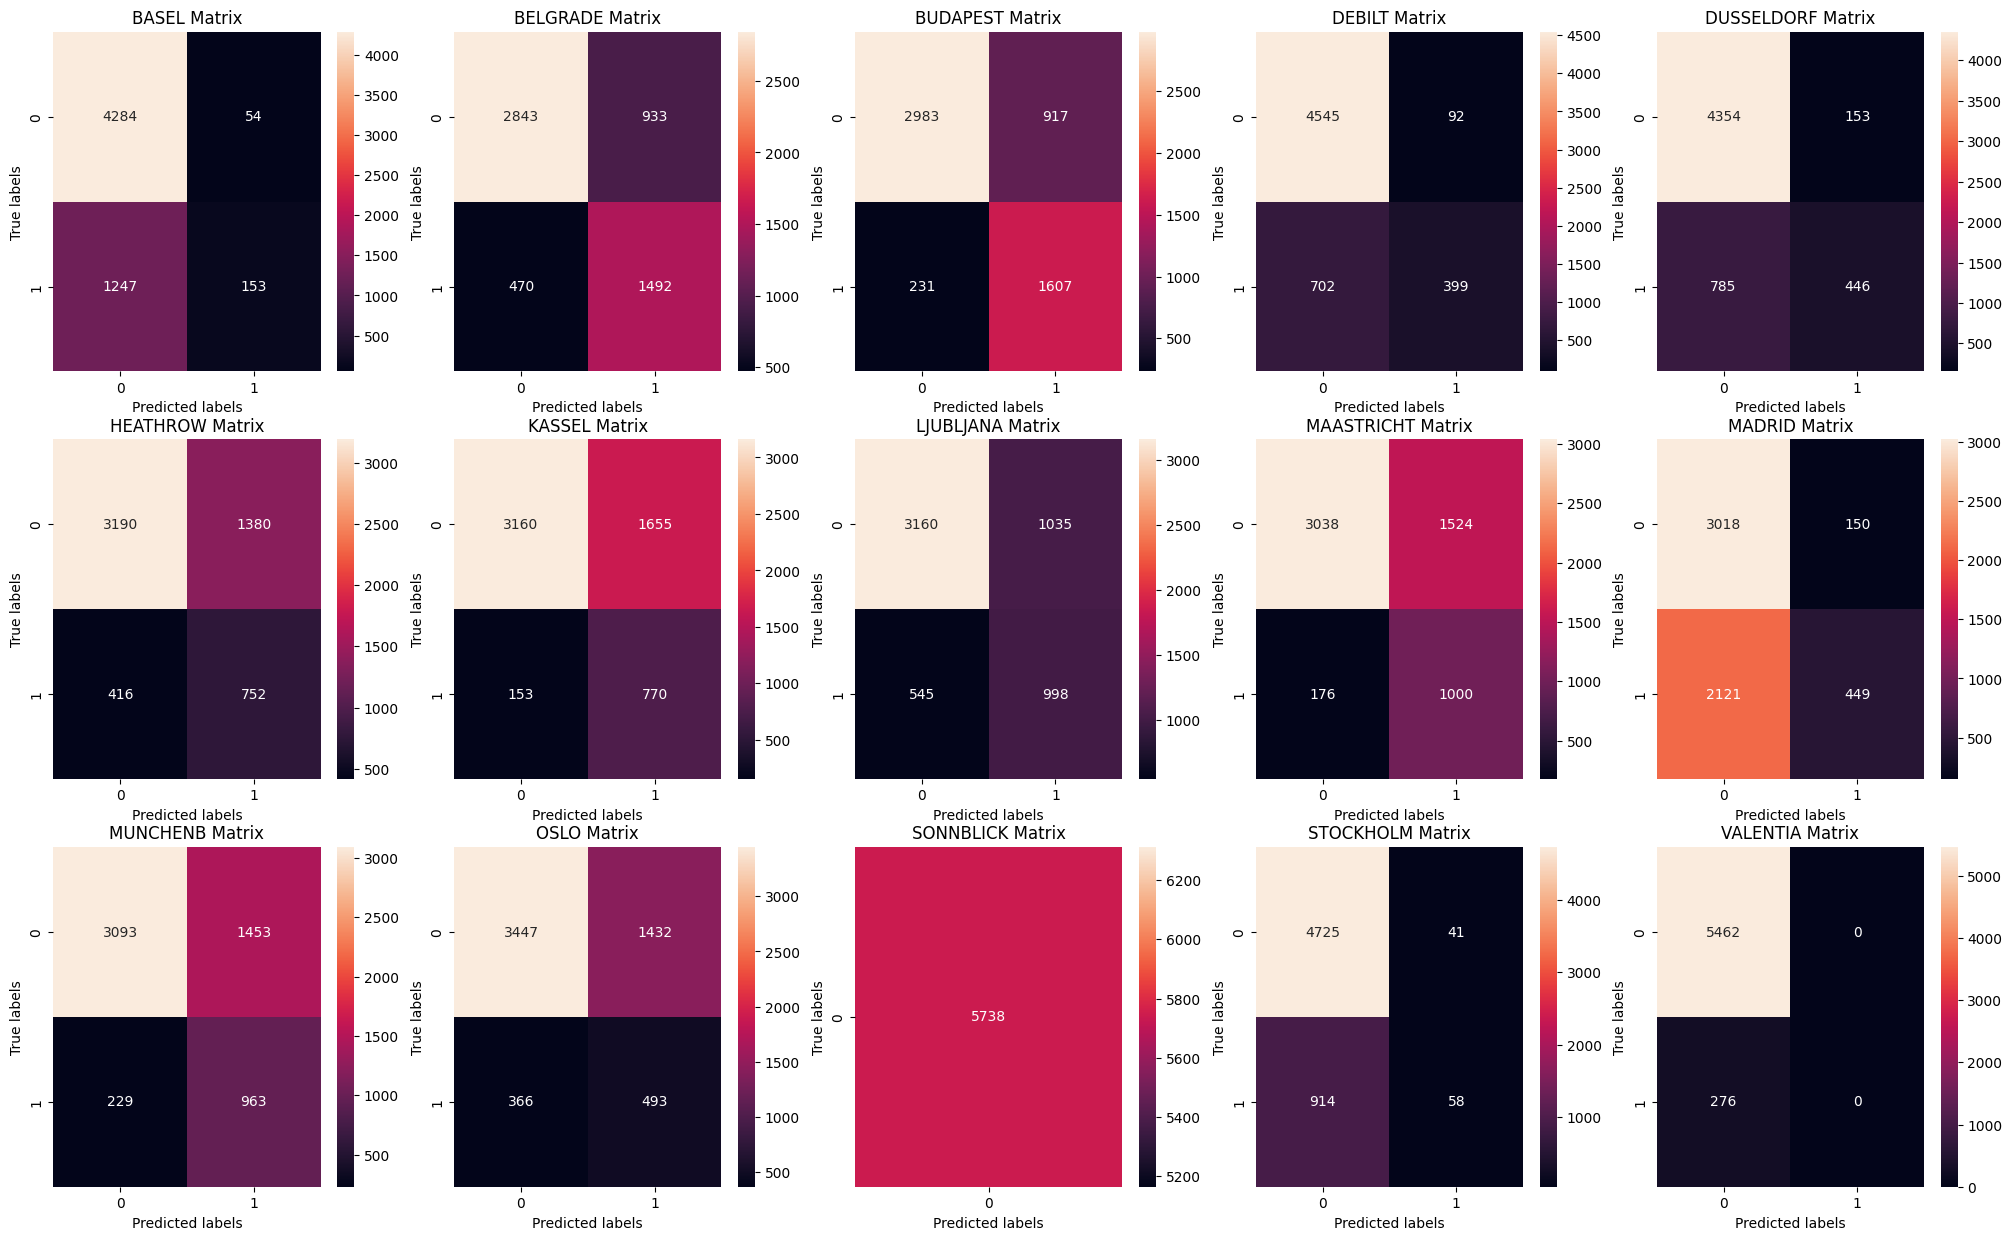

In [21]:
locations = list({x.split("_")[0] for x in df_labels.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        cr=classification_report(y_test.loc[:,name+key], y_pred[:,count])
        print(cr)
        print()

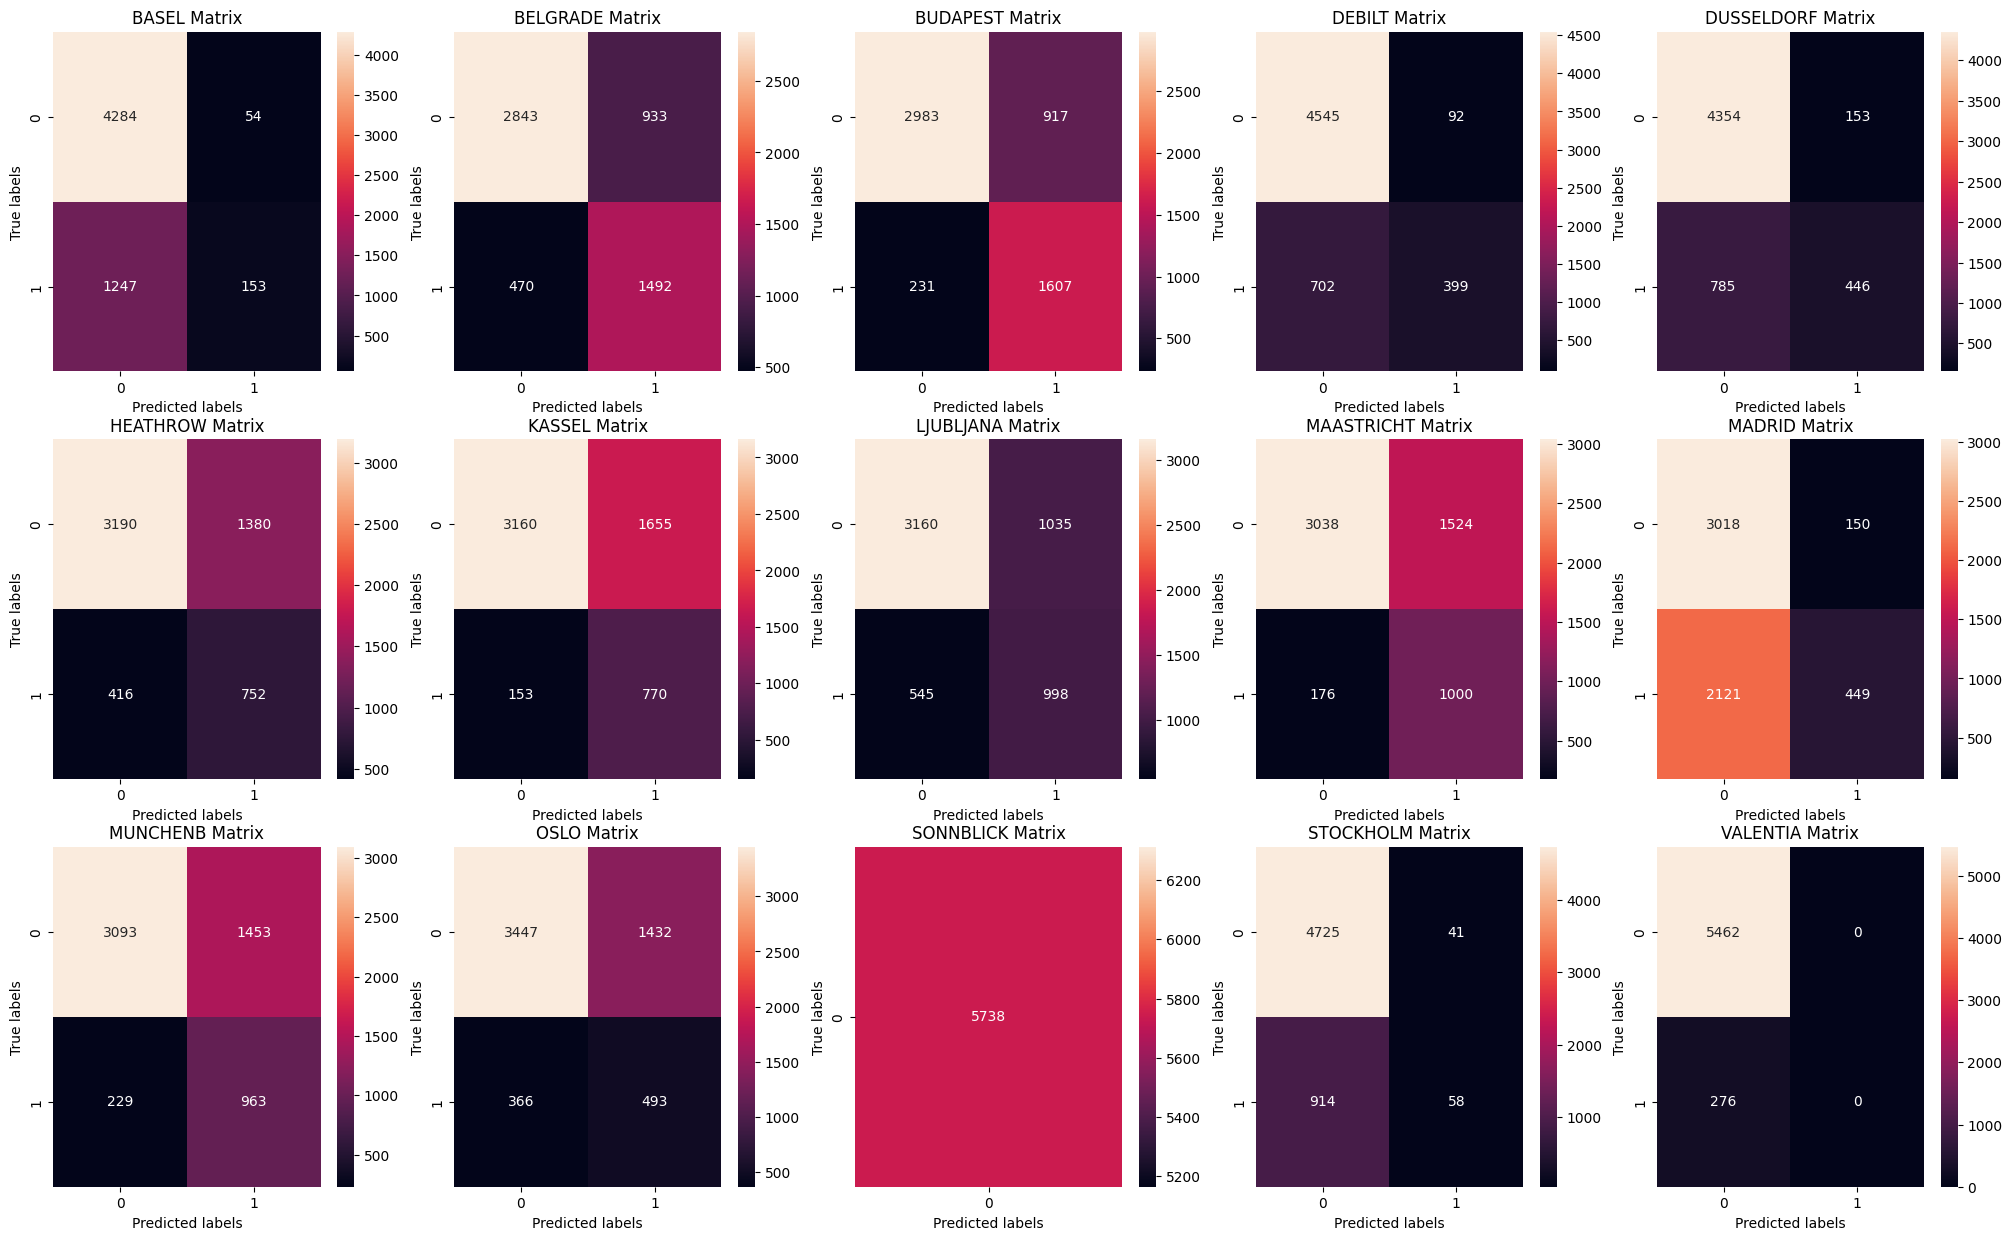

In [22]:
locations = list({x.split("_")[0] for x in df_labels.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1